In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",100) 

In [7]:
df=pd.read_csv('PBL5recommendationdata.csv', encoding ='latin-1')

In [8]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [9]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
1827,1524,fred,bartelt,Company137,1441211068,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1456954394,0.0,5933,1524,fred,bartelt,Company137,5933,NaN,NaN,NaN,USD,NaN,124.74,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.74,NaN,fedex,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.441211e+09,NaN,authorize.net,NaN,124.74,NaN,7491610257,62836,NaN,1,1441211144,1.441752e+09,1.441233e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7692,5933,

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [11]:
df.corr()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.purchase_order,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.attributes,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.vendor,Products.import_id,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_type,Products.amazon_price,Products.google_adwords,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.websites,Products.audio,Products.seo_footer,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.markup,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
Customers.id,1.000000,0.951397,NaN,0.087253,NaN,-0.639947,1.0,NaN,NaN,NaN,0.891923,0.363692,0.931931,1.000000,0.515002,0.571197,NaN,-0.032623,-0.040149,-0.004721,0.657639,0.105056,NaN,NaN,0.044152,0.057158,-0.037907,0.187999,NaN,NaN,-1.0,-0.088350,0.885575,-0.046010,NaN,NaN,0.168347,0.885630,0.906843,0.886407,NaN,NaN,NaN,NaN,NaN,-0.102061,0.320346,0.931643,0.931931,0.399430,NaN,NaN,-0.002762,-0.040332,-0.047251,NaN,NaN,0.020407,NaN,0.044151,0.396045,0.071312,NaN,0.294253,0.315419,NaN,-0.054290,-0.058560,-0.148926,-0.058923,-0.051465,-0.071350,NaN,-0.193089,-0.214644,-0.231730,-0.003188,NaN,-0.140056,NaN,NaN,NaN,-0.015171,NaN,NaN,NaN,NaN,NaN,NaN,-0.250860,0.024404,-0.274770,0.016610,0.007382,NaN,0.129465,-0.012930,-0.075404,-0.018854,NaN,-0.158864,-0.144105,-0.151182,-0.098889,-0.282855,NaN,0.055784,NaN
Customers.create_date,0.951397,1.000000,NaN,0.094404,NaN,-0.612277,1.0,NaN,NaN,NaN,0.883490,0.330749,0.891490,0.951397,0.460924,0.408765,NaN,-0.012880,-0.034733,-0.017057,0.671558,0.112978,NaN,NaN,0.053137,0.025668,-0.016653,0.185037,NaN,NaN,-1.0,-0.043323,0.936341,-0.025055,NaN,NaN,0.123481,0.936910,0.839279,0.935092,NaN,NaN,NaN,NaN,NaN,-0.039971,0.294274,0.896279,0.891490,0.384278,NaN,NaN,-0.003536,-0.025728,-0.034001,NaN,NaN,-0.140615,NaN,0.063760,0.382064,0.060735,NaN,0.268168,0.280648,NaN,-0.044928,-0.047666,-0.154201,-0.046971,-0.047779,-0.077668,NaN,-0.187662,-0.198281,-0.218402,-0.003190,NaN,-0.141576,NaN,NaN,NaN,-0.018182,NaN,NaN,NaN,NaN,NaN,NaN,-0.232475,0.010814,-0.275290,0.002708,0.023598,NaN,0.138321,-0.028929,-0.081397,-0.000640,NaN,-0.141344,-0.139152,-0.148081,-0.112419,-0.267895,NaN,0.044648,NaN
Customers.status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [12]:
abs(df.corr()['Orders.total']).sort_values(ascending=False)

Orders.total                 1.000000
Orders.weight                1.000000
Orders.subtotal              0.997013
Customers.tax_exempt         0.994398
Orders.payment_amount        0.992953
                               ...   
Products.seo_category             NaN
Products.markup                   NaN
Products.default_quantity         NaN
Products.leg_style                NaN
Products.freight_cost             NaN
Name: Orders.total, Length: 108, dtype: float64

In [14]:
abs(df.corr()['Orders.total']).sort_values(ascending=False).head(30)

Orders.total                      1.000000
Orders.weight                     1.000000
Orders.subtotal                   0.997013
Customers.tax_exempt              0.994398
Orders.payment_amount             0.992953
Orders.discount_amount            0.928716
Products.map_price                0.925721
Customers.account_id              0.913569
Products.amazon_price             0.716534
Products.sale_price               0.637339
Orders.fee_amount                 0.628024
Orders.coupon_amount              0.561841
Orders.external_id                0.489013
Orders.balance_due                0.482971
Order_Items.price                 0.428587
Order_Items.cost                  0.425841
Products.cost                     0.422208
Products.price                    0.412019
Products.shipping_weight          0.390454
Order_Items.qty                   0.384124
Products.list_price               0.380704
Orders.partial_ship               0.236900
Order_Items.flags                 0.230980
Orders.coup

In [13]:
df.isnull().sum().head(30)

Customers.id                  0
Customers.fname               0
Customers.lname               0
Customers.company          3467
Customers.create_date         0
Customers.status           4093
Customers.mailing          2080
Customers.reminders        4194
Customers.tax_exempt       4189
Customers.account_id       4191
Customers.sales_rep        4194
Customers.rewards          4194
Customers.profile_id       4194
Customers.last_modified       0
Customers.customer_type     423
Orders.id                     0
Orders.customer_id            0
Orders.fname                  0
Orders.lname                  0
Orders.company             3466
Orders.order_number           0
Orders.reorder_id          4112
Orders.external_source     3829
Orders.external_id         4189
Orders.currency               0
Orders.sales_rep           4194
Orders.subtotal               0
Orders.tax                  457
Orders.shipping             195
Orders.coupon_id           3312
dtype: int64

In [14]:
df[df.columns[df.isnull().any()]].isnull().sum().head(30)

Customers.company          3467
Customers.status           4093
Customers.mailing          2080
Customers.reminders        4194
Customers.tax_exempt       4189
Customers.account_id       4191
Customers.sales_rep        4194
Customers.rewards          4194
Customers.profile_id       4194
Customers.customer_type     423
Orders.company             3466
Orders.reorder_id          4112
Orders.external_source     3829
Orders.external_id         4189
Orders.sales_rep           4194
Orders.tax                  457
Orders.shipping             195
Orders.coupon_id           3312
Orders.coupon_amount       3312
Orders.gift_id             4194
Orders.gift_amount         4194
Orders.fee_name            3967
Orders.fee_amount          3916
Orders.discount_name       3912
Orders.discount_amount     3830
Orders.balance_due         3843
Orders.shipping_carrier     617
Orders.shipping_method      443
Orders.shipping_trans      4194
Orders.shipping_flags      4194
dtype: int64

In [15]:
cols = df.columns[df.isnull().mean()>0.2]
df2=df.drop(cols, axis=1)

In [16]:
df2.shape

(4194, 66)

In [17]:
df2.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,797,Christy,Dill,1426018724,1437764306,0.0,3758,797,Christy,Dill,3758,USD,57.20,0.0,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,1.463163e+09,MEDLINE,MDS86850EGS,62.0,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,24.80,7.50,30.40,PF61071,0.0
1,3,John,Smith,1386089139,1437764354,0.0,23,3,John,Smith,23,USD,20.00,NaN,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.0,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,MEDLINE,DYNC1674H,62.0,health-care-products,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,8.00,7.00,1.50,PF02132,NaN
2,3,John,Smith,1386089139,1437764354,0.0,9531,3,John,Smith,9531,USD,68.78,0.0,9.95,78.73,manual,0|Standard Shipping,NaN,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,1.463163e+09,MEDLINE,484805,62.0,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,13.23,10.04,10.24,PF00342,0.0
3,4,James,Anderson,1386780263,1437762646,0.0,29,4,James,Anderson,29,USD,19.56,0.0,9.95,29.55,NaN,11|Ground,7.96468E+14,3.0,1.386780e+09,NaN,29.55,NaN,NaN,1,1386780263,1.440529e+09,1.386800e+09,0.0,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,983.0,0.0,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,12.62,1.462595e+09,MEDLINE,MDS86615KH,62.0,health-care-products,NaN,"Walking Ai

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.create_date          4194 non-null   int64  
 4   Customers.last_modified        4194 non-null   int64  
 5   Customers.customer_type        3771 non-null   float64
 6   Orders.id                      4194 non-null   int64  
 7   Orders.customer_id             4194 non-null   int64  
 8   Orders.fname                   4194 non-null   object 
 9   Orders.lname                   4194 non-null   object 
 10  Orders.order_number            4194 non-null   object 
 11  Orders.currency                4194 non-null   object 
 12  Orders.subtotal                4194 non-null   f

In [19]:
df2[df2.columns[df2.isnull().any()]].isnull().sum().head(30)

Customers.customer_type    423
Orders.tax                 457
Orders.shipping            195
Orders.shipping_carrier    617
Orders.shipping_method     443
Orders.tracking            376
Orders.payment_status        5
Orders.payment_date         18
Orders.payment_type        384
Orders.payment_amount       18
Orders.payment_id          430
Orders.payment_code        748
Orders.updated_date         23
Orders.shipped_date        346
Orders.customer_type       183
Order_Items.product_id      43
Order_Items.cost             3
Products.id                157
Products.status            157
Products.template          221
Products.vendor            157
Products.import_id         157
Products.name              157
Products.display_name      532
Products.list_price        177
Products.price             158
Products.cost              157
Products.last_modified     157
Products.shopping_brand    162
Products.shopping_mpn      160
dtype: int64

In [20]:
for i in df2.select_dtypes(include=np.object):
    df2[i].fillna(df2[i].value_counts().sort_values(ascending=False).index[0],inplace=True)

In [21]:
for i in df2.select_dtypes(include=np.number):
    df2[i].fillna(df2[i].mean(),inplace=True)

In [22]:
df2.isnull().sum()

Customers.id                     0
Customers.fname                  0
Customers.lname                  0
Customers.create_date            0
Customers.last_modified          0
Customers.customer_type          0
Orders.id                        0
Orders.customer_id               0
Orders.fname                     0
Orders.lname                     0
Orders.order_number              0
Orders.currency                  0
Orders.subtotal                  0
Orders.tax                       0
Orders.shipping                  0
Orders.total                     0
Orders.shipping_carrier          0
Orders.shipping_method           0
Orders.tracking                  0
Orders.payment_status            0
Orders.payment_date              0
Orders.payment_type              0
Orders.payment_amount            0
Orders.payment_id                0
Orders.payment_code              0
Orders.status                    0
Orders.placed_date               0
Orders.updated_date              0
Orders.shipped_date 

In [23]:
x=pd.get_dummies(df2,drop_first=True)

In [24]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.6285252292216575
Number of cluster 3,silhouette0.5633842460343333
Number of cluster 4,silhouette0.4923029269346225
Number of cluster 5,silhouette0.48384390455099774
Number of cluster 6,silhouette0.5024952889206349
Number of cluster 7,silhouette0.46197771921279246
Number of cluster 8,silhouette0.507898100396593
Number of cluster 9,silhouette0.5006751437563152


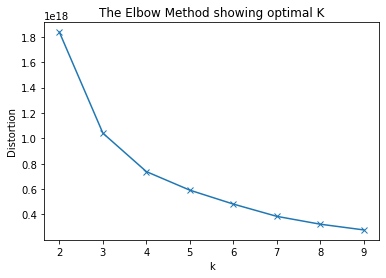

In [25]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() 

In [26]:
from yellowbrick.cluster import KElbowVisualizer

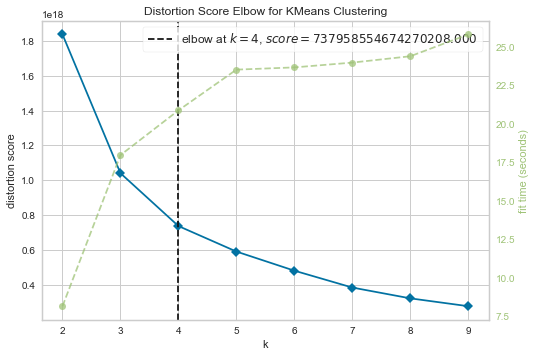

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x)
visu.poof()

In [28]:
model=KMeans(n_clusters=4)

In [29]:
model=model.fit(x)

In [30]:
pred=model.predict(x)

In [31]:
pred

array([0, 2, 0, ..., 3, 3, 3], dtype=int32)

In [32]:
x['cluster']=pred

In [33]:
silhouette_score(x,pred)

0.4923029269346225

In [34]:
df3 = df.filter(['Customers.id','Customers.fname','Customers.lname'], axis=1)
df3['Cluster']=pred

In [35]:
df3

,Customers.id,Customers.fname,Customers.lname,Cluster
0,797,Christy,Dill,0
1,3,John,Smith,2
2,3,John,Smith,0
3,4,James,Anderson,2
4,5,Abraham,Pollak,2
...,...,...,...,...
4189,3730,Nora,Fontana,3
4190,3732,Kennithe,Tecora,3
4191,3733,Tinna,Randall,3
4192,3735,HALIMAH,SHAHID,3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


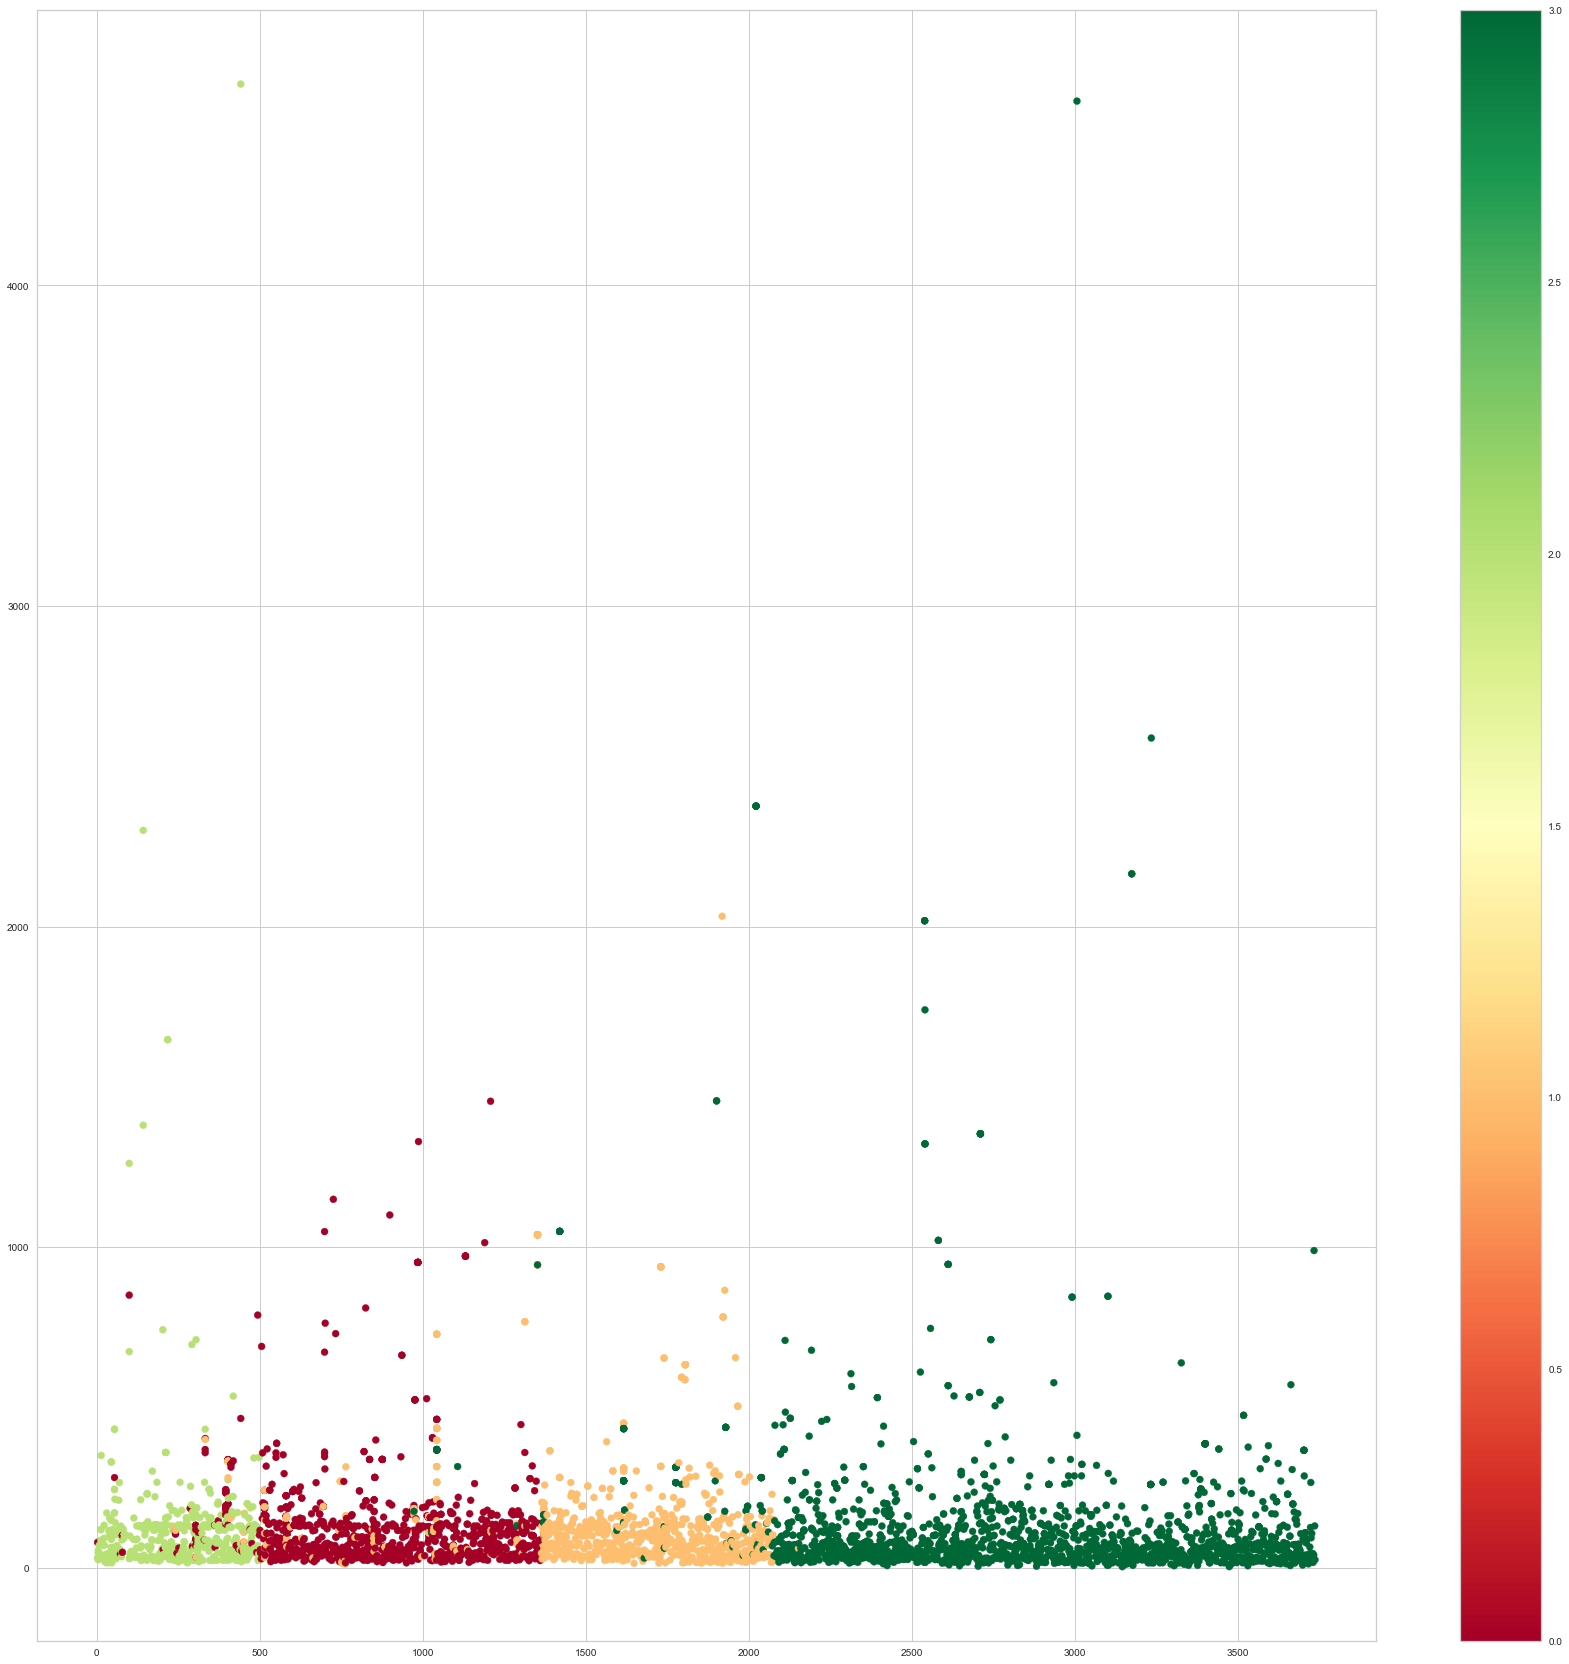

In [36]:
plt.figure(figsize=(30,30))
plt.scatter(y=x['Orders.total'],x=x['Customers.id'],c=pred, cmap='RdYlGn')
plt.legend()
plt.colorbar()
plt.show();

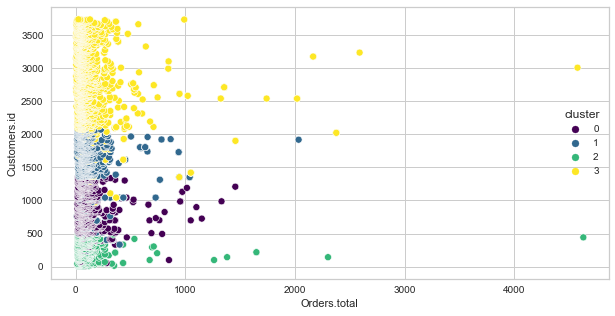

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x["Orders.total"], 
                x['Customers.id'], hue= x.cluster,palette= "viridis");